In [1]:
%matplotlib inline

import math
import matplotlib
import numpy as np
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

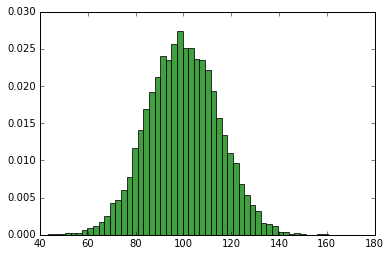

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.show()

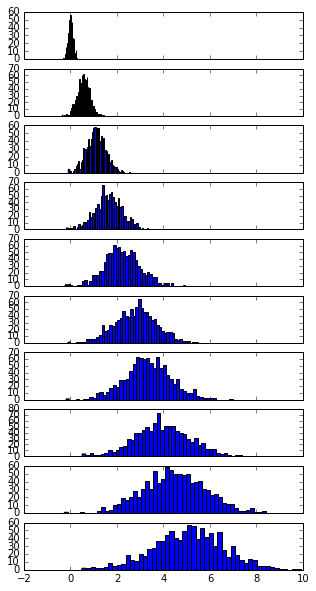

In [3]:
# gaussian distribution
# loc = mean, scale = standard deviation
n_pdfs = 10
n_x = 1000

mean = np.linspace(0, 5, num=n_pdfs)
stdev = np.linspace(0.1, 1.5, num=n_pdfs)

# compare distributions of random numbers vs. a pdf
# random numbers
rand_norm = np.zeros((n_x, n_pdfs))
for i in range(n_pdfs):
    rand_norm[:,i] = stats.norm.rvs(mean[i], stdev[i], n_x)

f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].hist(rand_norm[:,i], 50)


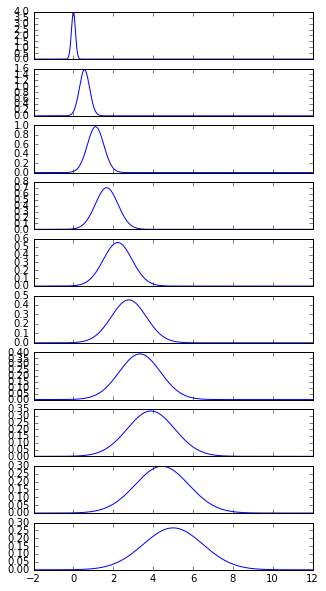

In [4]:
# gaussian probability distribution function
x = np.linspace(-2, 12, num=n_x)

pdfs_norm = np.zeros((n_x, n_pdfs)) # initialize

for i in range(n_pdfs):
    pdfs_norm[:,i] = stats.norm.pdf(x, loc=mean[i], scale=stdev[i])

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].plot(x, pdfs_norm[:,i])

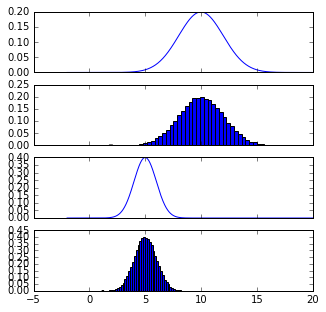

In [45]:
x = np.linspace(-2, 20, num=n_x)

mu1, sigma1 = 10, 2
mu2, sigma2 = 5, 1

pdf_norm1 = stats.norm.pdf(x, loc=mu1, scale=sigma1)
pdf_norm2 = stats.norm.pdf(x, loc=mu2, scale=sigma2)

rvs_norm1 = stats.norm.rvs(mu1, sigma1, n_x*100)
rvs_norm2 = stats.norm.rvs(mu2, sigma2, n_x*100)

f, axarr = plt.subplots(4, sharex=True, figsize=(5,5))
axarr[0].plot(x, pdf_norm1)
n1, bins1, patches1 = axarr[1].hist(rvs_norm1, 50, normed=1)
axarr[2].plot(x, pdf_norm2)
n2, bins2, patches2 = axarr[3].hist(rvs_norm2, 50, normed=1)

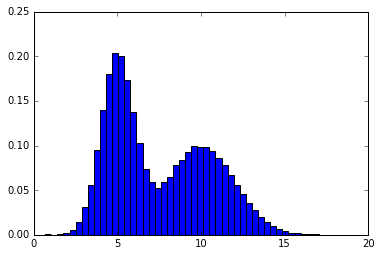

In [43]:
rvs_norm = np.append(rvs_norm1, rvs_norm2)
n, bins, patches = plt.hist(rvs_norm, 50, normed=1)

In [41]:
print(np.sum(np.diff(bins) * n)) # sums up to equal 1

1.0


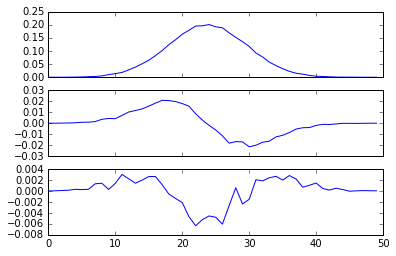

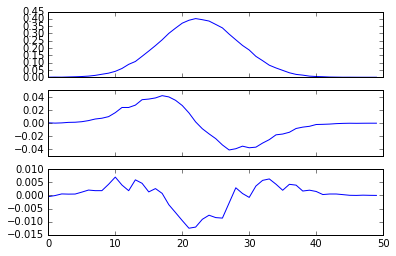

In [52]:
# distribution 1
n1prime = np.gradient(n1) # first derivative
n1primeprime = np.gradient(n1prime) # second derivative

f1, ax1 = plt.subplots(3, sharex=True)
ax1[0].plot(n1)
ax1[1].plot(n1prime) 
ax1[2].plot(n1primeprime) 

# distribution 2
n2prime = np.gradient(n2) # first derivative
n2primeprime = np.gradient(n2prime) # second derivative

f2, ax2 = plt.subplots(3, sharex=True)
ax2[0].plot(n2)
ax2[1].plot(n2prime) 
ax2[2].plot(n2primeprime) 

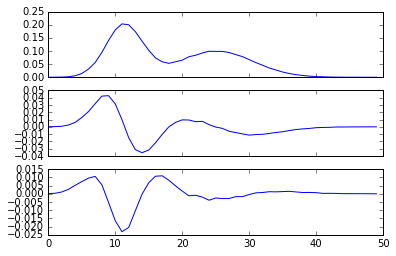

In [49]:
# combined
nprime = np.gradient(n) # first derivative
nprimeprime = np.gradient(nprime) # second derivative

f, ax = plt.subplots(3, sharex=True)
ax[0].plot(n)
ax[1].plot(nprime) 
ax[2].plot(nprimeprime) 

In [34]:
def hessian(x):
    """
    Calculate the hessian matrix with finite differences
    Parameters:
       - x : ndarray
    Returns:
       an array of shape (x.dim, x.ndim) + x.shape
       where the array[i, j, ...] corresponds to the second derivative x_ij
    """
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

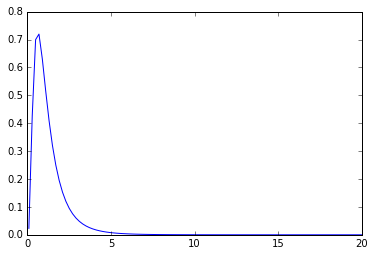

In [9]:
# log normal distribution
# single value simulation

M = float(1) # geometric mean
s = float(2) # geometric standard deviation
mu = np.log(M)
sigma = np.log(s)

# shape = sigma # scipy's shape (s) parameter, needs to be > 0 
# scale = np.exp(mu) # scipy's scale parameter

x = np.linspace(0.1, 20, num=100)

pdf_lnorm = lognorm.pdf(x, sigma, loc=0, scale=np.exp(mu))

plt.plot(x, pdf_lnorm)
plt.show()

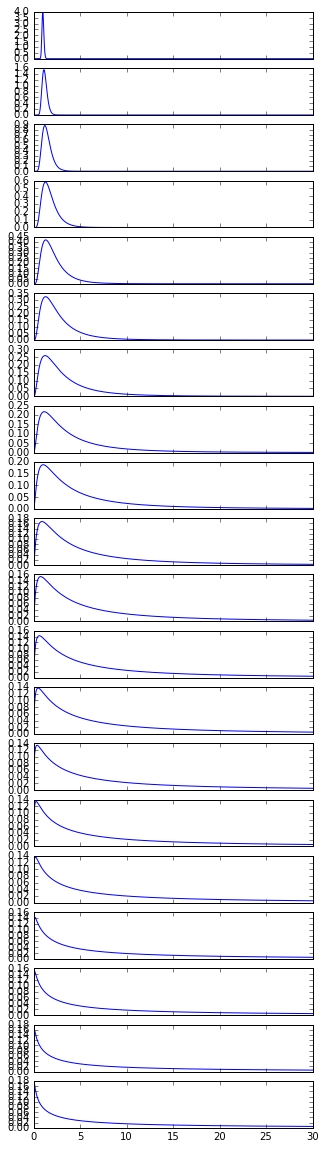

In [10]:
# series of values
n_pdfs = 20
n_x = 1000

mu = np.linspace(0, 3, num=n_pdfs)
sigma = np.linspace(0.1, 2.5, num=n_pdfs)

# shape = sigma # scipy's shape (s) parameter, needs to be > 0 
# scale = np.exp(mu) # scipy's scale parameter

x = np.linspace(0.1, 30, num=n_x)

pdfs_lnorm = np.zeros((n_x, n_pdfs)) # initialize

for i in range(n_pdfs):
    pdfs_lnorm[:,i] = lognorm.pdf(x, sigma[i], loc=0, scale=np.exp(mu[i]))

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].plot(x, pdfs_lnorm[:,i])
